In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
li_liable = os.listdir('split_liabilities/')
del li_liable[49781]

m = len(li_liable)
size_cut = 1000

In [3]:
m

77501

## Concatenating all structured asset balances sheets

In [4]:
li_asset = []
for cut in range(0,m,size_cut):
    filename = 'structured_asset/structured_asset_' +str(cut)+ '.csv'
    df_asset = pd.read_csv(filename)
    li_asset.append(df_asset)
    
structure_asset = pd.concat(li_asset)
structure_asset = structure_asset.sort_values(by = ['CIK','Filing Year'])

In [5]:
structure_asset

,CIK,Name,Filing Date,Filing Year,Account receivable,Cash and cash equivalents,Cash and securities segregated for benefit of customers or regulations,Collateralized short-term financing agreements,Deferred tax asset,Deposits with clearing organizations,...,Receivable from parent and affiliates,Receivables from customers and counterparties,Securities received as collateral,Time bank deposits,Total assets,Total current assets,U.S. government and government agency,Reconstructed Total assets,Relative Error,Total asset check
670,1841,ABEL/NOSER CORP.,2005-02-28,2004,NaN,640180.0,3008657.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11048146.0,NaN,NOT FOUND
93,1841,ABEL/NOSER CORP.,2006-03-01,2005,NaN,682772.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4437174.0,NaN,NOT FOUND
613,1841,ABEL/NOSER CORP.,2007-03-01,2006,NaN,925321.0,3140042.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15891466.0,NaN,NOT FOUND
183,1841,ABEL/NOSER CORP.,2008-02-29,2007,NaN,861377.0,3064960.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16131970.0,NaN,NOT FOUND
389,1841,ABEL/NOSER CORP.,2009-03-02,2008,NaN,854740.0,2104797.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14684570.0,NaN,NOT FOUND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1805203,BLUEPATH CAPITAL LLC,2021-02-25,2020,NaN,269998.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,273746.0,NaN,NaN,273746.0,0.0,PERFECT MATCH
419,1806592,KAWA SECURITIES LLC,2021-02-25,2020,390307.0,822948.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1235147.0,NaN,NaN,1235147.0,0.0,PERFECT MATCH
76,1808445,DIGITAL BROKERAGE SERVICES LLC,2021-02-25,2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25049000.0,NaN,NaN,25049000.0,0.0,PERFECT MATCH
24,1811184,"AVIDITI FINANCIAL, LLC",2021-03-31,2020,NaN,443766.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,484831.0,NaN,NaN,484831.0,0.0,PERFECT MATCH


In [6]:
structure_asset.columns

Index(['CIK', 'Name', 'Filing Date', 'Filing Year', 'Account receivable',
       'Cash and cash equivalents',
       'Cash and securities segregated for benefit of customers or regulations',
       'Collateralized short-term financing agreements', 'Deferred tax asset',
       'Deposits with clearing organizations', 'Escrow account balances',
       'Exchange memberships', 'Financial instruments owned, at fair value',
       'Fixed assets', 'Intangible assets, net amortization', 'Other assets',
       'Other receivables', 'PPE (net depreciation & amortization)',
       'Prepaid expenses', 'Receivable from broker-dealers',
       'Receivable from employees', 'Receivable from parent and affiliates',
       'Receivables from customers and counterparties',
       'Securities received as collateral', 'Time bank deposits',
       'Total assets', 'Total current assets',
       'U.S. government and government agency', 'Reconstructed Total assets',
       'Relative Error', 'Total asset check'],


In [7]:
import matplotlib.pyplot as plt

In [8]:
structure_asset['Total assets']

670           NaN
93            NaN
613           NaN
183           NaN
389           NaN
          ...    
129      273746.0
419     1235147.0
76     25049000.0
24       484831.0
571        8477.5
Name: Total assets, Length: 77453, dtype: float64

In [6]:
abs(structure_asset['Reconstructed Total assets'])

670    11048146.0
93      4437174.0
613    15891466.0
183    16131970.0
389    14684570.0
          ...    
129      273746.0
419     1235147.0
76     25049000.0
24       484831.0
571        8477.5
Name: Reconstructed Total assets, Length: 77453, dtype: float64

In [13]:
structure_asset['Reconstructed Total assets'].isna()

670    False
93     False
613    False
183    False
389    False
       ...  
129    False
419    False
76     False
24     False
571    False
Name: Reconstructed Total assets, Length: 77453, dtype: bool

In [29]:
recon = np.array(structure_asset['Reconstructed Total assets'])
tots = np.array(structure_asset['Total assets'])

In [33]:
recon@tots.T

nan

In [34]:
recon

array([1.1048146e+07, 4.4371740e+06, 1.5891466e+07, ..., 2.5049000e+07,
       4.8483100e+05, 8.4775000e+03])

In [48]:
plt.rcParams["figure.figsize"] = (11,10)

/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


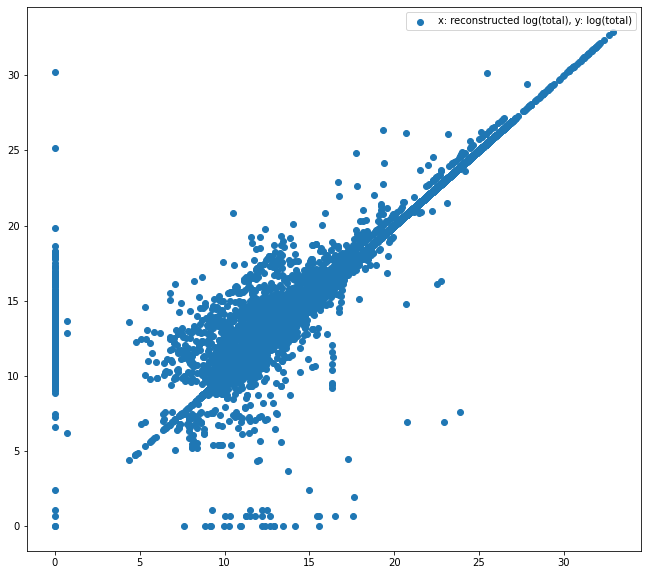

In [50]:
plt.scatter(np.log(1 + recon), np.log(1 + tots),label = 'x: reconstructed log(total), y: log(total)')
plt.legend()

(array([4.520e+02, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.500e+01, 1.000e+00,
        2.000e+00, 5.000e+00, 4.000e+00, 1.000e+01, 1.300e+01, 9.000e+00,
        1.400e+01, 2.800e+01, 3.000e+01, 5.200e+01, 2.950e+02, 8.200e+01,
        6.800e+01, 2.990e+02, 7.460e+02, 1.172e+03, 1.522e+03, 1.822e+03,
        2.206e+03, 2.468e+03, 2.747e+03, 3.127e+03, 3.589e+03, 3.919e+03,
        4.227e+03, 4.367e+03, 4.265e+03, 3.876e+03, 3.863e+03, 3.540e+03,
        3.235e+03, 2.844e+03, 2.489e+03, 2.332e+03, 2.243e+03, 1.898e+03,
        1.629e+03, 1.447e+03, 1.294e+03, 1.212e+03, 1.056e+03, 8.740e+02,
        7.070e+02, 6.040e+02, 4.740e+02, 3.950e+02, 4.040e+02, 3.080e+02,
        2.900e+02, 2.800e+02, 2.630e+02, 2.540e+02, 2.100e+02, 1.570e+02,
        1.670e+02, 1.680e+02, 1.750e+02, 1.610e+02, 1.850e+02, 1.330e+02,
        7.800e+01, 1.130e+02, 6.600e+01, 5.600e+01, 4.900e+01, 6.000e+01,
        3.600e+01, 1.100e+01, 3.000e+0

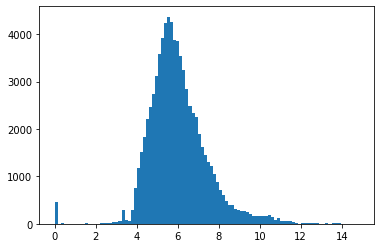

In [21]:
plt.hist(np.log10(1 + structure_asset['Reconstructed Total assets']), bins = 100)

In [10]:
max(structure_asset['Total assets'].dropna())/(1000000000*100)

1917.21013

(array([4.520e+02, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.500e+01, 2.000e+00,
        2.000e+00, 5.000e+00, 4.000e+00, 1.000e+01, 1.300e+01, 9.000e+00,
        1.500e+01, 2.900e+01, 3.200e+01, 5.600e+01, 2.980e+02, 8.300e+01,
        7.200e+01, 3.030e+02, 7.480e+02, 1.182e+03, 1.527e+03, 1.825e+03,
        2.214e+03, 2.478e+03, 2.753e+03, 3.136e+03, 3.595e+03, 3.926e+03,
        4.232e+03, 4.370e+03, 4.270e+03, 3.879e+03, 3.865e+03, 3.542e+03,
        3.237e+03, 2.847e+03, 2.492e+03, 2.335e+03, 2.245e+03, 1.900e+03,
        1.630e+03, 1.448e+03, 1.294e+03, 1.212e+03, 1.056e+03, 8.740e+02,
        7.070e+02, 6.040e+02, 4.750e+02, 3.950e+02, 4.040e+02, 3.080e+02,
        2.900e+02, 2.800e+02, 2.630e+02, 2.540e+02, 2.100e+02, 1.570e+02,
        1.670e+02, 1.680e+02, 1.750e+02, 1.610e+02, 1.850e+02, 1.330e+02,
        7.800e+01, 1.130e+02, 6.600e+01, 5.600e+01, 4.900e+01, 6.000e+01,
        3.600e+01, 1.100e+01, 3.000e+0

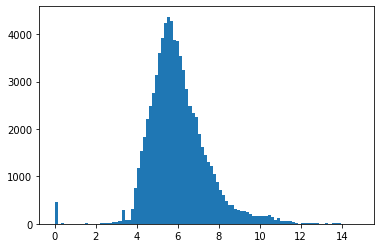

In [11]:
plt.hist(np.log10(1 + abs(structure_asset['Reconstructed Total assets'])), bins = 100)

In [6]:
structure_asset['Total asset check']

670        NOT FOUND
93         NOT FOUND
613        NOT FOUND
183        NOT FOUND
389        NOT FOUND
           ...      
129    PERFECT MATCH
419    PERFECT MATCH
76     PERFECT MATCH
24     PERFECT MATCH
571    PERFECT MATCH
Name: Total asset check, Length: 77453, dtype: object

In [7]:
sum(structure_asset['Total asset check'] == 'PERFECT MATCH')

56053

In [8]:
sum(structure_asset['Total asset check'] == 'BOUNDED MATCH')

1966

In [16]:
58000/93000

0.6236559139784946

In [15]:
structure_asset.to_csv('structured_asset.csv', index = False)  

## Concatenating all structured liabilities balances sheets

In [9]:
li_liable = []
for cut in range(0,m,size_cut):
    filename = 'structured_liable/structured_liability_' +str(cut)+ '.csv'
    df_liable = pd.read_csv(filename)
    li_liable.append(df_liable)
    
structure_liable = pd.concat(li_liable)
structure_liable = structure_liable.sort_values(by = ['CIK','Filing Year'])

In [10]:
structure_liable

,CIK,Name,Filing Date,Filing Year,Accounts payable,Accrued liabilities,Additional paid-in capital,Collateralized borrowing agreements,"Common stock, par value",Current liabilities,...,Total liabilities,Total liabilities and shareholder's equity,Total shareholder's equity,Treasury stock,Reconstructed Total liabilities and shareholder's equity,Reconstructed Total liabilities and shareholder's equity (less total liabilites),Reconstructed Total liabilities and shareholder's equity (less total equity),Reconstructed Total liabilities and shareholder's equity (less total L+E),Total liabilities & shareholder's equity check,Relative Error
670,1841,ABEL/NOSER CORP.,2005-02-28,2004,NaN,NaN,NaN,NaN,NaN,1085352.0,...,NaN,NaN,60504.0,NaN,11048146.0,11048146.0,10987642.0,10987642.0,NOT FOUND,NaN
93,1841,ABEL/NOSER CORP.,2006-03-01,2005,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,60504.0,NaN,10536146.0,10536146.0,10475642.0,10475642.0,NOT FOUND,NaN
613,1841,ABEL/NOSER CORP.,2007-03-01,2006,NaN,NaN,NaN,NaN,NaN,1867961.0,...,NaN,NaN,60504.0,NaN,15891466.0,15891466.0,15830962.0,15830962.0,NOT FOUND,NaN
183,1841,ABEL/NOSER CORP.,2008-02-29,2007,NaN,NaN,NaN,NaN,NaN,1638537.0,...,NaN,NaN,60504.0,NaN,16131970.0,16131970.0,16071466.0,16071466.0,NOT FOUND,NaN
389,1841,ABEL/NOSER CORP.,2009-03-02,2008,NaN,NaN,NaN,NaN,NaN,1566148.0,...,NaN,NaN,60504.0,NaN,14684570.0,14684570.0,14624066.0,14624066.0,NOT FOUND,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1805203,BLUEPATH CAPITAL LLC,2021-02-25,2020,NaN,NaN,NaN,NaN,NaN,8013.0,...,NaN,273746.0,265262.0,NaN,273746.0,273746.0,8484.0,8484.0,PERFECT MATCH,0.000000
419,1806592,KAWA SECURITIES LLC,2021-02-25,2020,NaN,NaN,NaN,NaN,NaN,301345.0,...,NaN,1235147.0,933802.0,NaN,1235147.0,1235147.0,301345.0,301345.0,PERFECT MATCH,0.000000
76,1808445,DIGITAL BROKERAGE SERVICES LLC,2021-02-25,2020,NaN,90000.0,NaN,NaN,NaN,NaN,...,NaN,25049000.0,23037000.0,NaN,25049000.0,25049000.0,2012000.0,2012000.0,PERFECT MATCH,0.000000
24,1811184,"AVIDITI FINANCIAL, LLC",2021-03-31,2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,484831.0,1049028.0,NaN,484830.0,484830.0,-564198.0,-564198.0,BOUNDED MATCH,0.000002


In [11]:
sum(structure_liable['Total liabilities & shareholder\'s equity check'] == 'PERFECT MATCH')

55802

In [12]:
sum(structure_liable['Total liabilities & shareholder\'s equity check'] == 'BOUNDED MATCH')

2823

In [13]:
structure_liable.to_csv('structured_liability.csv', index = False)  